In [126]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
inv = np.linalg.inv
import bio_lda.lda as lda
import bio_lda.util as util

In [127]:
np.random.seed(2)
samples = int(10e3) # Number of samples in dataset
d = 10 # Dimensionality of Data
proportions = [0.1,0.9] # Proportion of samples in classes
X, y, m1, m2, cov = util.generate_dataset(samples, d, proportions, l=1)


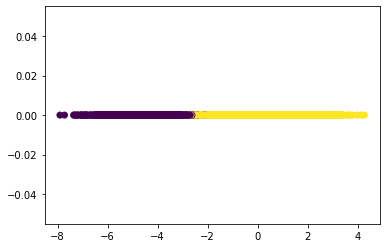

0.7316


In [128]:
y_, true_LDA_score, clf = util.scikit_LDA(X, y)
plt.scatter(y_,np.zeros(y_.shape), c = y)
plt.show()
print(true_LDA_score)


In [129]:
def eta(t):
    return 1e-2

def gamma(t):
    return 1e-4

In [130]:
np.random.seed(0)
LDA, err, metric, optimal = util.run_offline(X, y, m1, m2, cov, true_LDA_score, eta, gamma, epochs=2000)

100%|██████████| 2000/2000 [00:01<00:00, 1571.02it/s]


In [131]:
# Offline Accuracy
Y = LDA.w.T.dot(X.T)
max((np.sum(Y[:,y == 1] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[:,y == 0] < 1/2 * LDA.w.T@(m1+m2))), (np.sum(Y[:,y == 0] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[:,y == 1] < 1/2 * LDA.w.T@(m1+m2))) )/X.shape[0]

0.9943

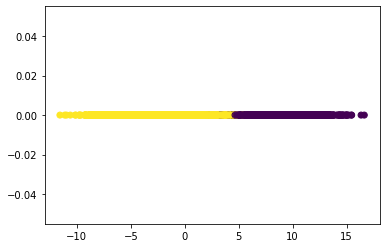

In [132]:
plt.scatter(Y,np.zeros(Y.shape), c = y)
plt.show()

In [133]:
# Optimal Accuracy
optimal_W = np.linalg.inv(cov)@(m1-m2)
Y = optimal_W.T.dot(X.T)
max((np.sum(Y[y == 1] > 1/2 * optimal_W.T@(m1+m2)) + np.sum(Y[y == 0] < 1/2 * optimal_W.T@(m1+m2))), (np.sum(Y[y == 0] > 1/2 * optimal_W.T@(m1+m2)) + np.sum(Y[y == 1] < 1/2 * optimal_W.T@(m1+m2))) )/X.shape[0]

0.9944

In [134]:
optimal[-1], err[-1]

(0.023574342435328077, -0.26269999999999993)

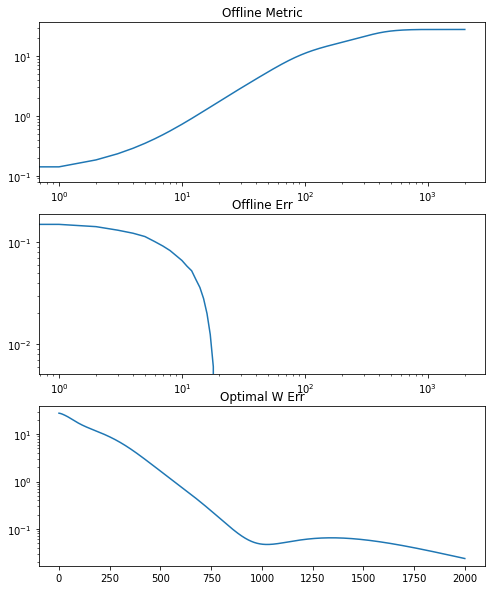

In [135]:
fig, axs = plt.subplots(3,1, figsize=(8,10))

axs[0].loglog(metric)
axs[0].set_title("Offline Metric") # Value of W
axs[1].loglog(err)
axs[1].set_title("Offline Err") # Accuracy
axs[2].semilogy(optimal)
axs[2].set_title("Optimal W Err") # Err of W from Optimal W
plt.show()

  0%|          | 2/2000 [00:00<01:44, 19.18it/s]

1e-05 1e-05


100%|██████████| 2000/2000 [01:51<00:00, 17.32it/s]


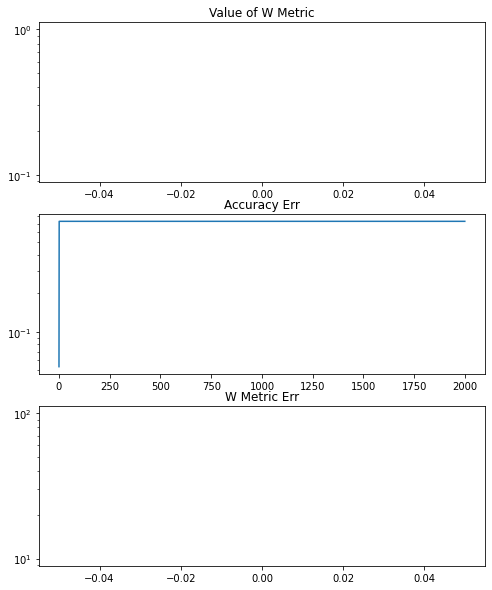

  0%|          | 2/2000 [00:00<01:48, 18.46it/s]

1e-05 1.0000000000000002e-06


100%|██████████| 2000/2000 [01:51<00:00, 17.89it/s]


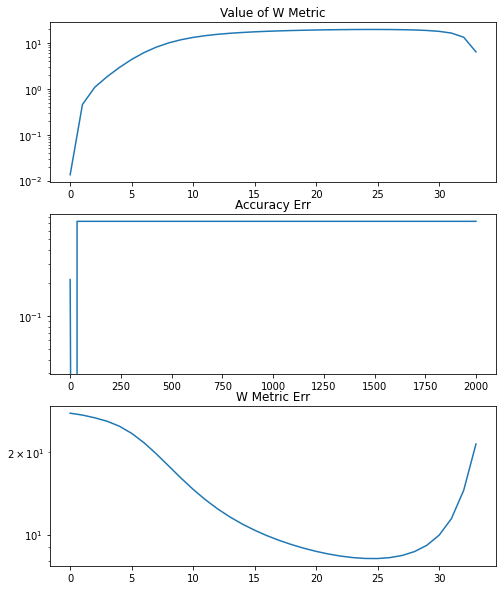

  0%|          | 2/2000 [00:00<01:42, 19.43it/s]

1e-05 1.0000000000000001e-07


100%|██████████| 2000/2000 [03:05<00:00, 11.17it/s]


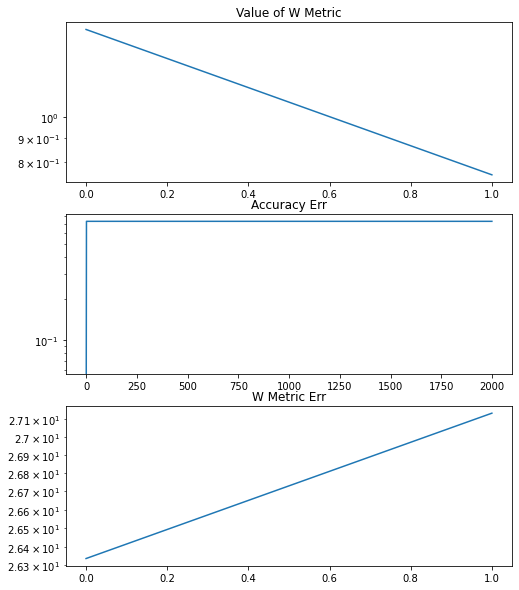

  0%|          | 2/2000 [00:00<02:44, 12.17it/s]

1e-05 1e-08


100%|██████████| 2000/2000 [03:26<00:00,  9.66it/s]


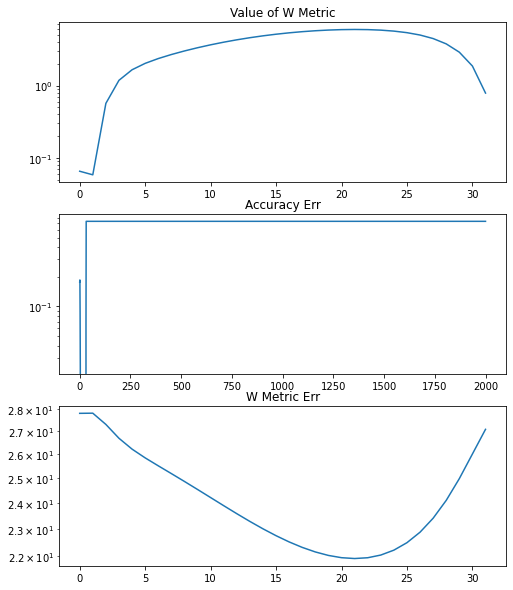

  0%|          | 2/2000 [00:00<02:59, 11.14it/s]

1e-06 1e-06


100%|██████████| 2000/2000 [03:02<00:00,  8.63it/s]


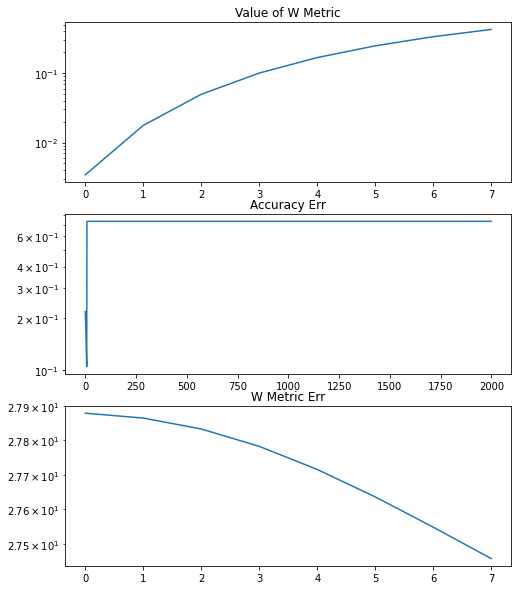

  0%|          | 2/2000 [00:00<03:07, 10.64it/s]

1e-06 1e-07


100%|██████████| 2000/2000 [03:30<00:00,  9.23it/s]


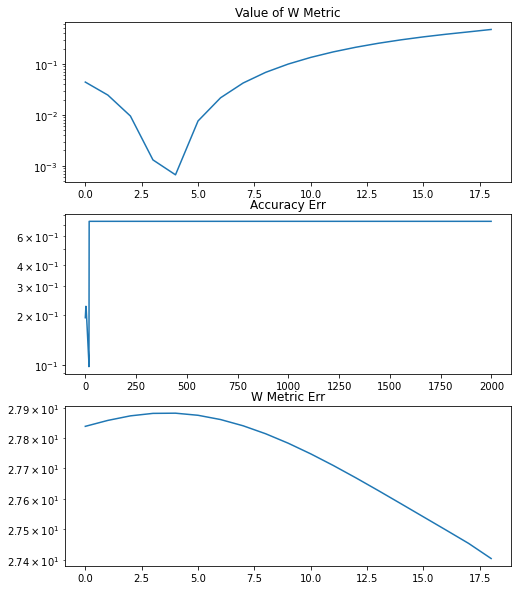

  0%|          | 2/2000 [00:00<02:45, 12.07it/s]

1e-06 1e-08


100%|██████████| 2000/2000 [03:25<00:00, 11.58it/s]


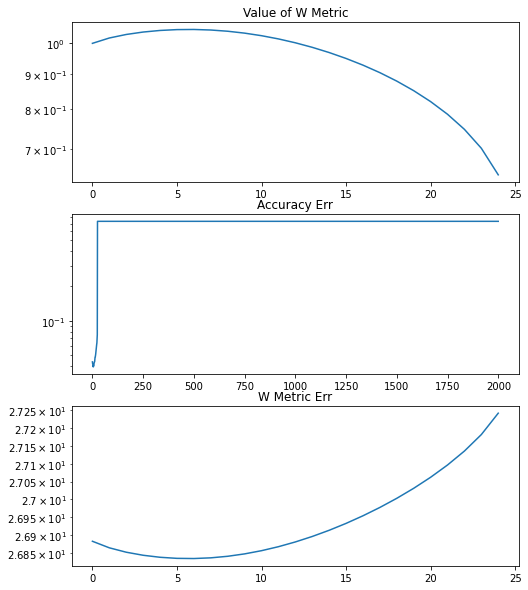

  0%|          | 2/2000 [00:00<02:38, 12.59it/s]

1e-06 1e-09


100%|██████████| 2000/2000 [03:13<00:00,  9.39it/s]


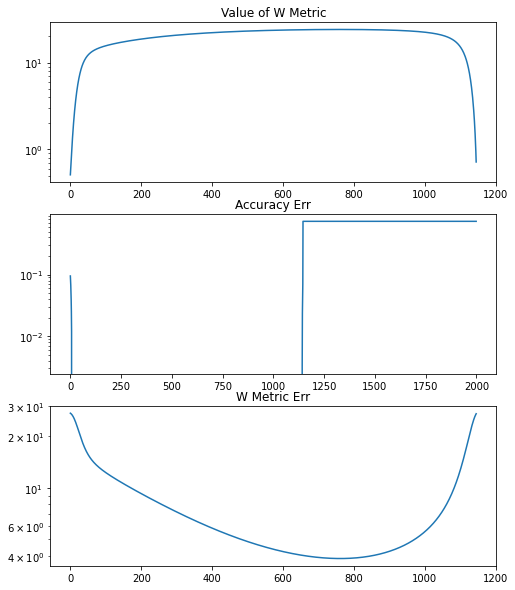

  0%|          | 0/2000 [00:00<?, ?it/s]

1e-07 1e-07


100%|██████████| 2000/2000 [03:31<00:00,  7.95it/s]


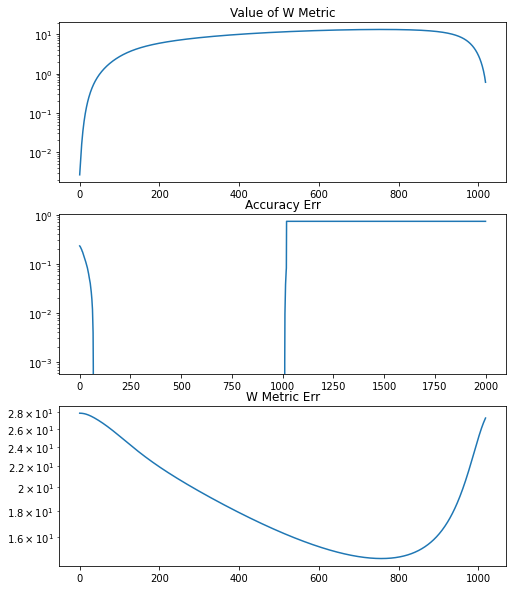

  0%|          | 2/2000 [00:00<03:18, 10.07it/s]

1e-07 1e-08


100%|██████████| 2000/2000 [03:34<00:00, 10.25it/s]


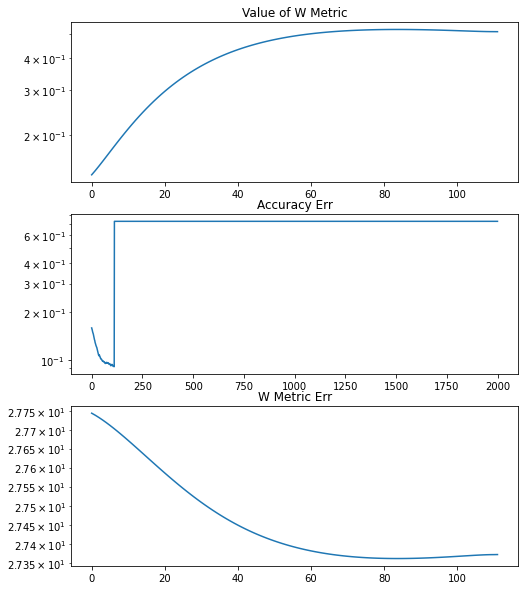

  0%|          | 0/2000 [00:00<?, ?it/s]

1e-07 1e-09


100%|██████████| 2000/2000 [03:28<00:00,  9.57it/s]


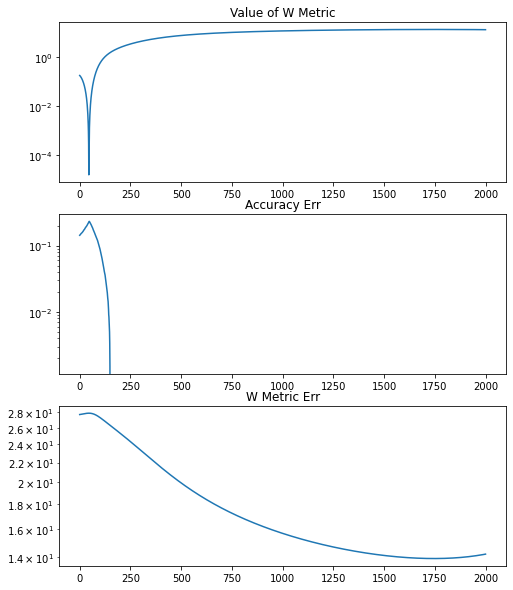

  0%|          | 2/2000 [00:00<03:01, 11.02it/s]

1e-07 1e-10


100%|██████████| 2000/2000 [03:23<00:00,  9.82it/s]


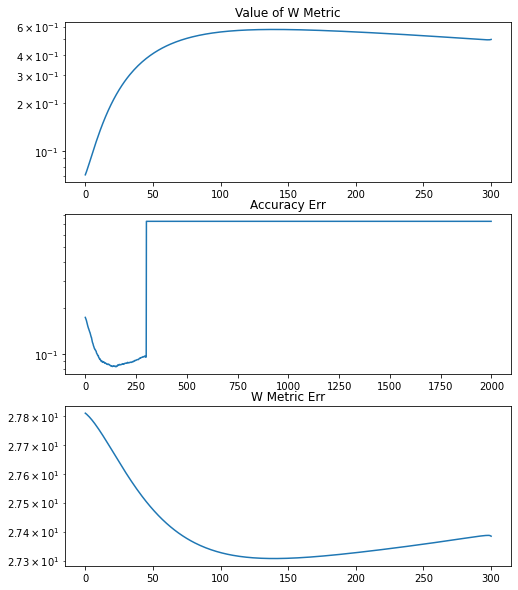

  0%|          | 0/2000 [00:00<?, ?it/s]

1e-08 1e-08


100%|██████████| 2000/2000 [03:15<00:00,  8.95it/s]


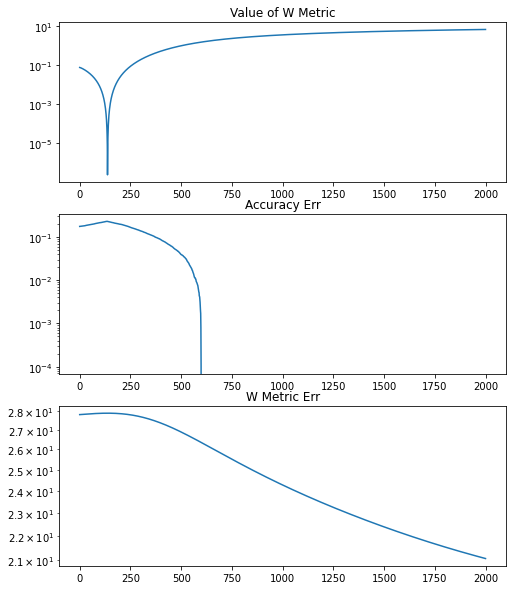

  0%|          | 2/2000 [00:00<02:19, 14.37it/s]

1e-08 1e-09


100%|██████████| 2000/2000 [07:16<00:00, 13.40it/s]  


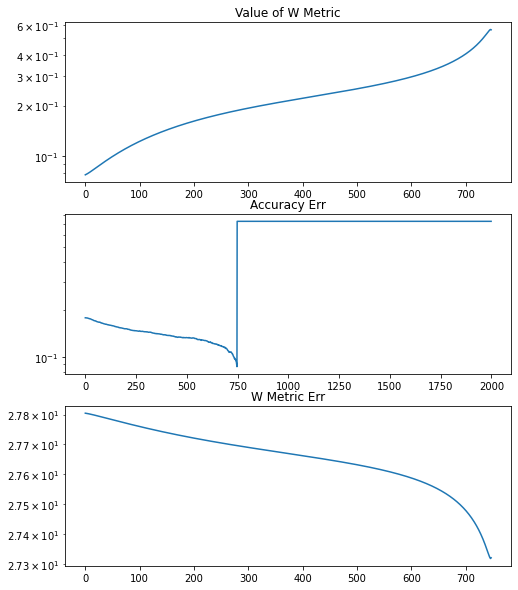

  0%|          | 3/2000 [00:00<01:08, 29.21it/s]

1e-08 1e-10


100%|██████████| 2000/2000 [01:35<00:00, 16.52it/s]


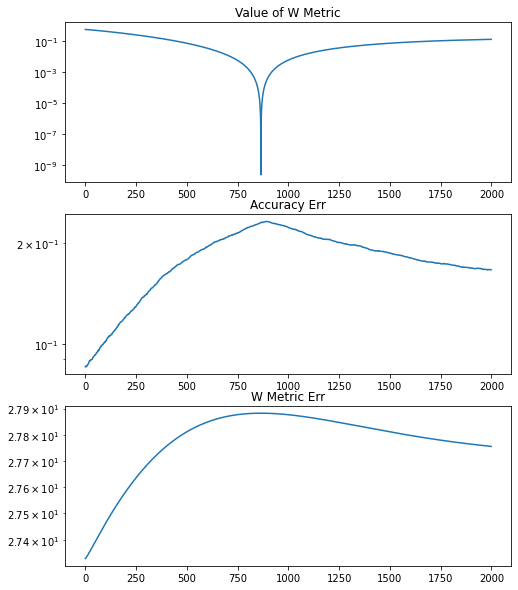

  0%|          | 3/2000 [00:00<01:26, 23.04it/s]

1e-08 1.0000000000000001e-11


100%|██████████| 2000/2000 [01:47<00:00, 14.88it/s]


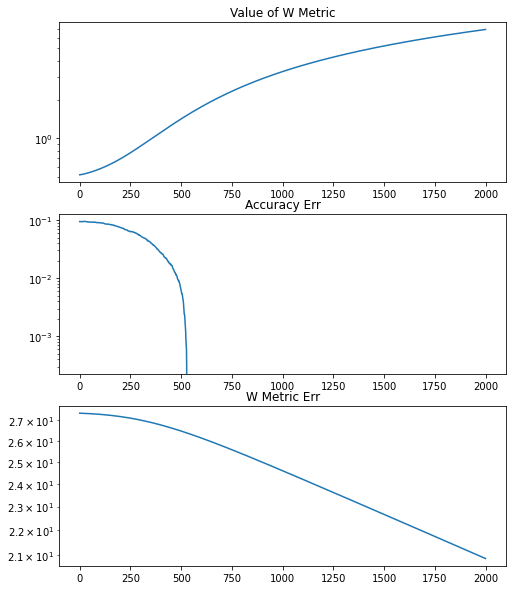

In [146]:
for eta in [1e-5,1e-6,1e-7,1e-8]:
    for factor in [1e-0,1e-1,1e-2,1e-3]:
        gamma = eta*factor
        print(eta, gamma)
        LDA, err, metric, optimal, s, mu_d = util.run_online(X, y, m1, m2, cov,  true_LDA_score, eta, gamma, epochs=2000)
        fig, axs = plt.subplots(3,1, figsize=(8,10))
        axs[0].semilogy(metric)
        axs[0].set_title("Value of W Metric") # Value of W
        axs[1].semilogy(err)
        axs[1].set_title("Accuracy Err") # Accuracy
        axs[2].semilogy(optimal)
        axs[2].set_title("W Metric Err") # Err of W from Optimal W
        plt.show()

In [151]:
eta = 1e-8
gamma = 1e-10

In [152]:
LDA, err, metric, optimal, s, mu_d = util.run_online(X, y, m1, m2, cov,  true_LDA_score, eta, gamma, epochs=3000)

100%|██████████| 3000/3000 [02:28<00:00, 24.27it/s]


In [153]:
s = []
for count, x in enumerate(X):
    if y[count] == 0:
        s.append((x - LDA.mu1).reshape(-1,1)@(x-LDA.mu1).reshape(-1,1).T)

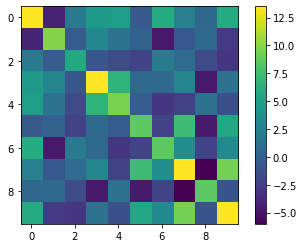

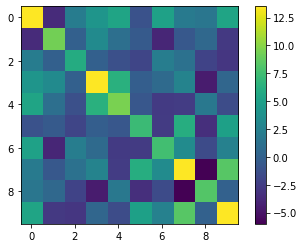

In [154]:
plt.imshow(util.calculate_covariance_matrix(X[:int(proportions[0]*samples)]), clim= [-6,13.5])
plt.colorbar()
plt.show()
plt.imshow(np.sum(s, axis=0)/1000, clim= [-6,13.5])
plt.colorbar()
plt.show()

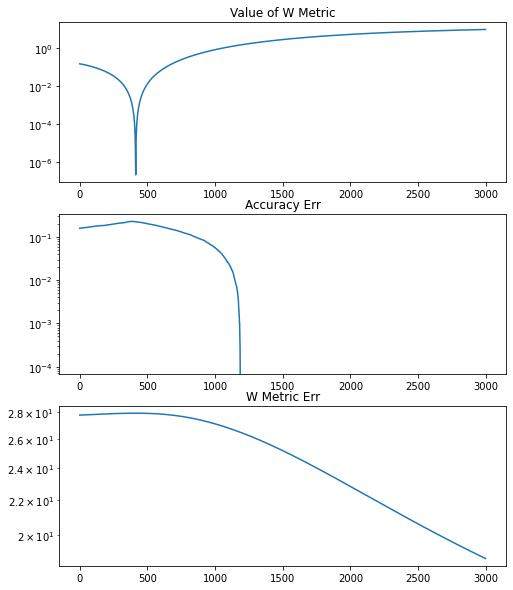

In [155]:
fig, axs = plt.subplots(3,1, figsize=(8,10))

axs[0].semilogy(metric)
axs[0].set_title("Value of W Metric") # Value of W
axs[1].semilogy(err)
axs[1].set_title("Accuracy Err") # Accuracy
axs[2].semilogy(optimal)
axs[2].set_title("W Metric Err") # Err of W from Optimal W
plt.show()

In [156]:
optimal[-1], err[-1]

(18.7819450030346, -0.19879999999999998)

In [157]:
# Online Accuracy
Y = LDA.w.T.dot(X.T)
max((np.sum(Y[y == 1] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[y == 0] < 1/2 * LDA.w.T@(m1+m2))), (np.sum(Y[y == 0] > 1/2 * LDA.w.T@(m1+m2)) + np.sum(Y[y == 1] < 1/2 * LDA.w.T@(m1+m2))) )/X.shape[0]

0.9304

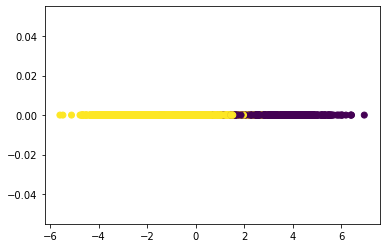

In [158]:
plt.scatter(Y,np.zeros(Y.shape), c = y)
plt.show()